# Decision Trees

## About the Dataset
This assignment uses a datset from the UCI Machine Learning Repository that contains red wine features based on physiocochemical tests. You will be using the features to predict the quality of the wine, which is a score between 0 and 10 based on sensory data. Scores greater than or equal to 7 indicate that the quality is good, and scores less than 7 indicate that the quality is bad. 

**Features:**

***Input variables:***

1 - Fixed Acidity

2 - Volatile Acidity

3 - Citric Acid

4 - Residual Sugar

5 - Chlorides

6 - Free Sulfur Dioxide

7 - Total Sulfur Dioxide

8 - Density

9 - pH

10 - Sulphates

11 - Alcohol

***Output variable:***

12 - Quality (1 for Good & 0 for Bad)

For more information about the dataset, visit https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
import math
import pandas as pd
import numpy as np

# Download the data from UCI Machine Learning Repository
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

df = pd.read_csv('winequality-red.csv', sep =';')
# remove NA's and reset the index
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df = df.reset_index(drop=True)
df.head()

---
**Question 1**: Set the quality for good wines to 1 and the quality for bad wines to 0. How many good quality and bad quality wines are in this dataset?

In [ ]:
# YOUR CODE HERE
wine = df.copy() # make a copy so the original data does not get changed

good = 0
bad = 0

print('There are', good, 'good wines and', bad, 'bad wines')

# Data Visualization and Introduction to Decision Boundaries

---
**Question 2a):** Let's try to visualize our data to gain better intuition on the different features for classificiation. For the purposes of easy visualization, create a scatter plot using the two features **volatile acidity** and **total sulfur dioxide**. Remember to label your graph! Refer to [seaborn.scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) documentation.  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# YOUR CODE HERE

---
**Question 2b):** How might you try to classify the data based on just these two features and our scatter plot? E.g. Volatile acidity < (number1) and total sulfur dioxide < (number2) would be classified as good quality. Approximate the values of number1 and number2.

In [ ]:
number1 = # YOUR CODE HERE
number2 = # YOUR CODE HERE

---
**Question 2c):** Why could this visualization be misleading and make our approximations from the previous part wrong?

**Answer:**

---
**Question 2d):** Let's now try to visualize a simpler 1D case to see if we can more accurately find the decision boundary between good and bad quality wine. Create a scatter plot of volatile acidity against quality. 

In [ ]:
# YOUR CODE HERE

---
**Question 2e):** Add random uniform noise between [-0.1, 0.1] to the wine quality for each of our data points to better visualize the different data points. This technique is known as jittering. Refer to [np.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) documentation. 



In [ ]:
# YOUR CODE HERE

---
**Question 2f):** Now looking at the above plot, do you think your estimate from question **2b)** would do an accurate job in differentiating between good and bad quality wine? In other words, do you think you could easily draw a vertical line to split the good quality and bad quality wine? This is the idea of a decision boundary.

**Answer:**
 

In the following parts of the project, we will formalize a process known as decision trees to better classify whether a wine is good quality or bad quality.

# Best Split Using the Gini Index
The Gini Index is a value ranging from $[0, 1]$ that represents the probability a feature will be incorrectly classified when randomly selected. In decision trees, features with a low gini index are highly desirable because it indicates that the classification is pure.

---
**Question 3a**: Implement the following function to compute the Gini Index. 

What is the Gini Index for the parent node? 

Recall that the Gini Index for a parent node can be calculated with the following formula: *$Gini(D) = 1 - \sum_{i=1}^{m} p_i^{2}$

*$p_i$ is the percentage of instances in $D$ when $i$ is the label

In [ ]:
def compute_gini(X):
  # YOUR CODE HERE

  return gini

gini = ...

print('The Gini Index for the parent node is:', gini)

---
**Question 3b)** The Gini Index for an attribute/split can be calculated with the following formula: 

$Gini_A(D) = \frac{|D_1|}{|D|}Gini(D_1) + \frac{|D_2|}{|D|}Gini(D_2)$

Implement the following helper functions to help us find the Gini Index for an attribute

In [ ]:
# Implement a function to find all possible split values for an attribute
def find_splits_gini(X, column):
    split_values = []
    # YOUR CODE HERE

    # Set the split value to be the midpoint between consecutive values of the feature
    # YOUR CODE HERE

    return split_values

# Next, implement a function to find the best split point for a feature and the 
# gini value of the best split
def best_split_point(X, column, splits):
    best_split = 0
    min_gini = 100000
    # YOUR CODE HERE

    return best_split, min_gini

---
**Question 3c**: Using the helper functions above, find the **best feature** that minimizes the Gini Index of its best split point. The best feature will be the root node of the decision tree. What is the **best split point** for this feature? What is the **gini index** of the best split point?

In [ ]:
# YOUR CODE HERE

print('The best feature is:', best_feature)
print('The best split point for', best_feature, 'is:', best_split)
print('The gini index of the best split point for', best_feature, 'is:', min_gini)

# Entropy (Information Gain)

We just saw that we found the best split by using the Gini index but that is not the only splitting method. In this section, we will explore a similar metric called entropy. The concept of gini and entropy in fact arose from similar motivations. Gini came from statistics and entropy from computer science/information theory. 

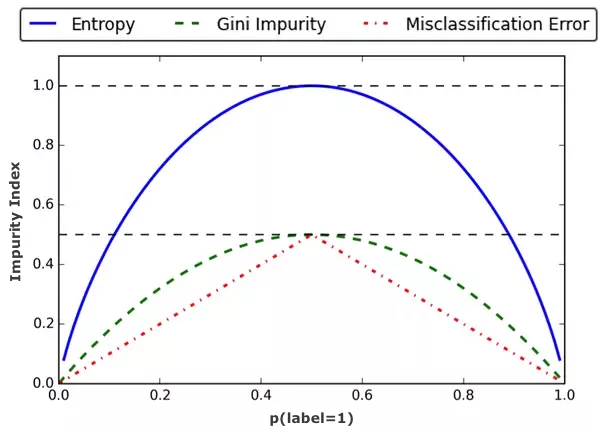


The graph above shows the visualization of these two metrics for binary classification as well as the misclassifation error for comparison. We notice that they are very similar. Let's explore entropy in more detail! 

---
**Question 4a)** Recall from physics what entropy represents. Entropy is a measure of the molecular disorder, or randomness, of a system. Let's try to model the "surprise" of some random variable $Y$ taking on the value $k$. This can be shown as,

"surprise" = $-log(P(Y = k))$

Find the limit of the "surprise" as $P(Y=k)$ approaches $0$.
Find the limit of the "surpise" as $P(Y=k)$ approaches $1$.
Explain why the above results make sense.


**ANSWER:**

---
**Question 4b)** Now lets try to formalize this idea of "surprise". The expectation of the surpise is denoted as the entropy $H$. 
$H(Y) = E[-logP(Y)] =- \sum_{k}P(Y=k)logP(Y=k)$

Now we can use this concept of entropy to decide on which split is the best by treating the probability of $k$ as the proportion of data points in a node with label $k$. We can now find the entropy of a node through this formula. 

Define the entropy $S$ of a node as:
$S = - \sum_{c}p_clog_2p_c$

**Find the entropy of the parent node.**

In [ ]:
# YOUR CODE HERE
parent_entropy = ...

print('The entropy for the parent node is:', parent_entropy)

---
**Question 4c)** We can now use use weighted entropy as a loss function to help us decide on the best split. 

$Loss$ = $\frac {N_1S(X) + N_2S(Y)}{N_1 + N_2}$


The above shows an example of a split given two nodes $X$ and $Y$ where $S(X)$ and $S(Y)$ represents the entropy of each and $N_1$ and $N_2$ represents the total number of samples respectively. 

Now, describe how you would use this loss function to find the best split for the wine data.

**ANSWER:** 

---
**Question 4d)** Implement the following helper functions to help us find the best split.

In [ ]:
# First implement a function to calculate the entropy given a split
def compute_entropy(split):
  # YOUR CODE HERE

  return entropy

# Next implement a function to find all possible split values, this will set the 
# the threshold of determining where the split goes
def find_splits_entropy(X, column):
    # Sort the unique values of the feature
    # YOUR CODE HERE


    # Initialize the split values
    # YOUR CODE HERE


    # Set the split value to be the average value from the previous one
    # YOUR CODE HERE


    return split_values

# Next implement a function to find the weighted entropy of the splits, use the previous
# compute_entropy function to help with the implementation
def compute_splits_entropy(y, splits):
  # YOUR CODE HERE

    return splits_entropy

# Next implement a function which will actually split the values based on the
# threshold value
def split(X, y, column, value):
  # YOUR CODE HERE

    return left_y, right_y

---
**Question 4e)** Finally, using the helper functions and **question 4c)**, implement the find_best_split function which will find the best split by minimizing the weighted entropy. 

In [ ]:
def find_best_split(X, y, max_features):
    subset = np.random.choice(X.shape[1], max_features, replace = False)
    # Set default best split attributes
    # YOUR CODE HERE

    for column in subset:
      # Find the split values
      # YOUR CODE HERE
        
        for value in split_values:
            # Split on the value
            # YOUR CODE HERE
            
            # Find the information gain of the splits, this is the parent entropy
            # subtracted by the splits entropy
            # YOUR CODE HERE
            

            if best_gain is None or gain > best_gain:
                # Update the best split attributes
                

    return best_col, best_val, best_gain

---
**Question 4f)** Using find_best_split, report the **best feature**, **split value**, and the **information gain** (parent entropy - splits entropy) using the wine data.  

In [ ]:
# YOUR CODE HERE
best_col = None
best_val = None
best_gain = None
print('The best feature is:', df.columns[best_col])
print("The best split value is:", best_val)
print("The best gain is:", best_gain)

---
**Question 4g)** How does the best feature and split value using information gain compare to the best feature and split value using the Gini Index?

**Answer:**


# Building a Decision Tree Model

**Question 5a**: Split the data into testing and training sets and then apply standard scaling to the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_tree = wine.copy()
# YOUR CODE HERE

**Question 5b**: Train a decision tree classifier with a depth of three. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# YOUR CODE HERE

---
**Question 5c**: What is the accuracy of the decision tree classifier on the training data? 

In [ ]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE 
accuracy = ...

print('The accuracy of the decision tree classifier on the training data is:', accuracy)

---
**Question 5d**: What is the accuracy of the decision tree classifier on the testing data? 

In [ ]:
# YOUR CODE HERE 
accuracy = ...

print('The accuracy of the decision tree classifier on the testing data is:', accuracy)

---
**Question 5e**: Visualize your decision tree with graphviz. Comment on your observations.



In [ ]:
!sudo apt-get install graphviz

In [ ]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
from sklearn import tree

out = StringIO() 
tree.export_graphviz(clf, out_file=out,
                      feature_names=list(df_tree.columns),  
                          class_names=['Bad Quality', 'Good Quality'],  
                          filled=True, rounded=True,  
                          special_characters=True)
graph = pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

**Observations:**